# **IMPORT LIBRARY**

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **GATHERING / LOAD DATA**

In [27]:
df = pd.read_excel('pizza_sales_dataset.xlsx', sheet_name="pizza_sales")
df.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


# **ASSESSING DATA**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


## **Missing Value**

In [29]:
df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

## **Duplicate Data**

In [30]:
df.duplicated().sum()

0

## **Invalid Value**

In [31]:
df.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


# **EXPLORATORY DATA ANALYSIS (EDA)**

## **Total Orderan Berdasarkan Hari dan Bulan**

In [32]:
order_per_hari = df.groupby(pd.to_datetime(df['order_date']).dt.strftime('%A'))['order_id'].count().sort_values(ascending=False)
print("Jumlah order per hari adalah: \n", order_per_hari)

Jumlah order per hari adalah: 
 order_date
Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: order_id, dtype: int64


In [33]:
order_per_bulan = df.groupby(pd.to_datetime(df['order_date']).dt.strftime('%B'))['order_id'].count().sort_values(ascending=False)
print("Jumlah order per bulan adalah: \n", order_per_bulan)

Jumlah order per bulan adalah: 
 order_date
July         4301
May          4239
March        4186
November     4185
January      4156
August       4094
April        4067
June         4025
February     3892
December     3859
September    3819
October      3797
Name: order_id, dtype: int64


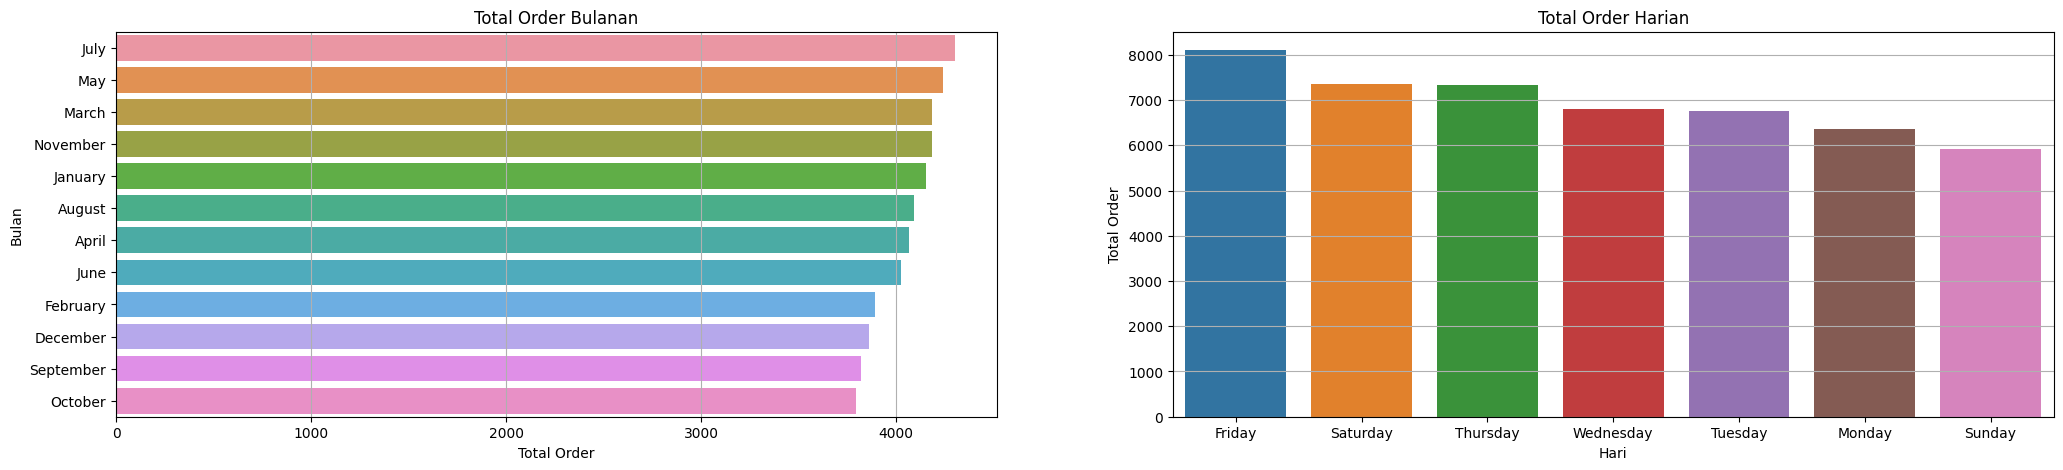

In [34]:
plt.figure(figsize=(25,5))

plt.subplot(1,2,1)
sns.barplot(x=order_per_bulan.values, y=order_per_bulan.index, data=df)
plt.title("Total Order Bulanan")
plt.xlabel("Total Order")
plt.ylabel("Bulan")
plt.grid(axis='x')

plt.subplot(1,2,2)
sns.barplot(x=order_per_hari.index, y=order_per_hari.values, data=df)
plt.title("Total Order Harian")
plt.xlabel("Hari")
plt.ylabel("Total Order")
plt.grid(axis='y')

plt.show()

## **Pendapatan Hasil Penjualan Per Bulan**

In [35]:
pendapatan_per_bulan = df.groupby(pd.to_datetime(df['order_date']).dt.strftime('%B'))['total_price'].sum()
pendapatan_per_bulan

order_date
April        68736.80
August       68278.25
December     64701.15
February     65159.60
January      69793.30
July         72557.90
June         68230.20
March        70397.10
May          71402.75
November     70395.35
October      64027.60
September    64180.05
Name: total_price, dtype: float64

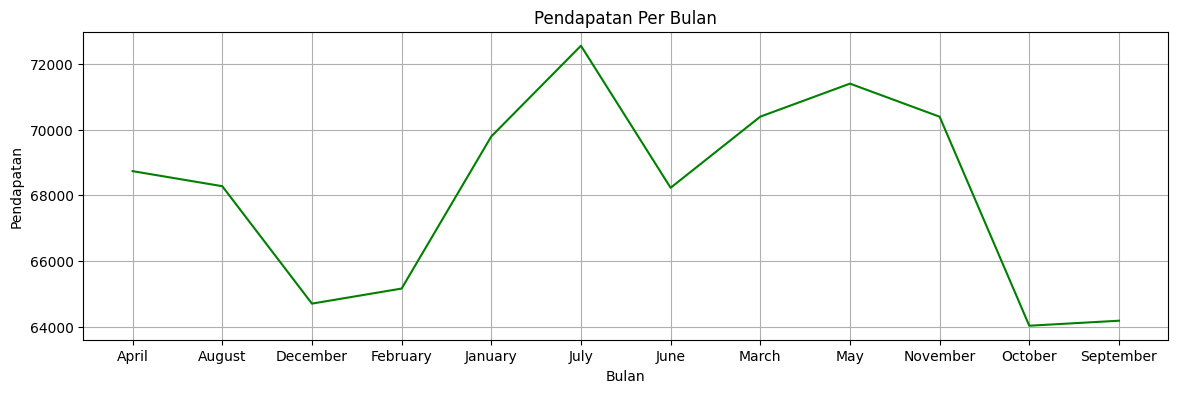

In [36]:
plt.figure(figsize=(14,4))
plt.plot(pendapatan_per_bulan.index, pendapatan_per_bulan.values, color="green")
plt.title('Pendapatan Per Bulan')
plt.xlabel("Bulan")
plt.ylabel("Pendapatan")
plt.grid()
plt.show()

## **Penjualan Berdasarkan Ukuran Pizza**

In [37]:
df['pizza_size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [38]:
ukuran_pizza = df['pizza_size'].value_counts()
ukuran_pizza

L      18526
M      15385
S      14137
XL       544
XXL       28
Name: pizza_size, dtype: int64

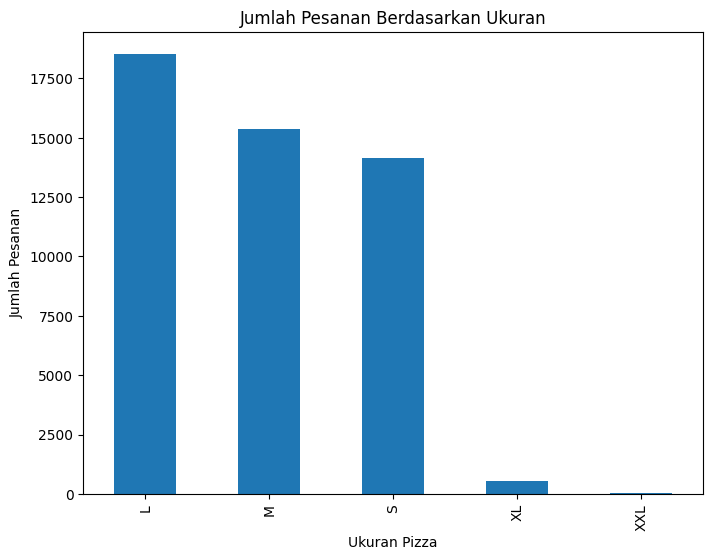

In [39]:
plt.figure(figsize=(8, 6))
ukuran_pizza.plot(kind='bar')
plt.title('Jumlah Pesanan Berdasarkan Ukuran')
plt.xlabel('Ukuran Pizza')
plt.ylabel('Jumlah Pesanan')
plt.show()

## **Penjualan Berdasarkan Kategori Pizza**

In [40]:
kategori_pizza = df.groupby(df['pizza_category']).quantity.sum()
kategori_pizza

pizza_category
Chicken    11050
Classic    14888
Supreme    11987
Veggie     11649
Name: quantity, dtype: int64

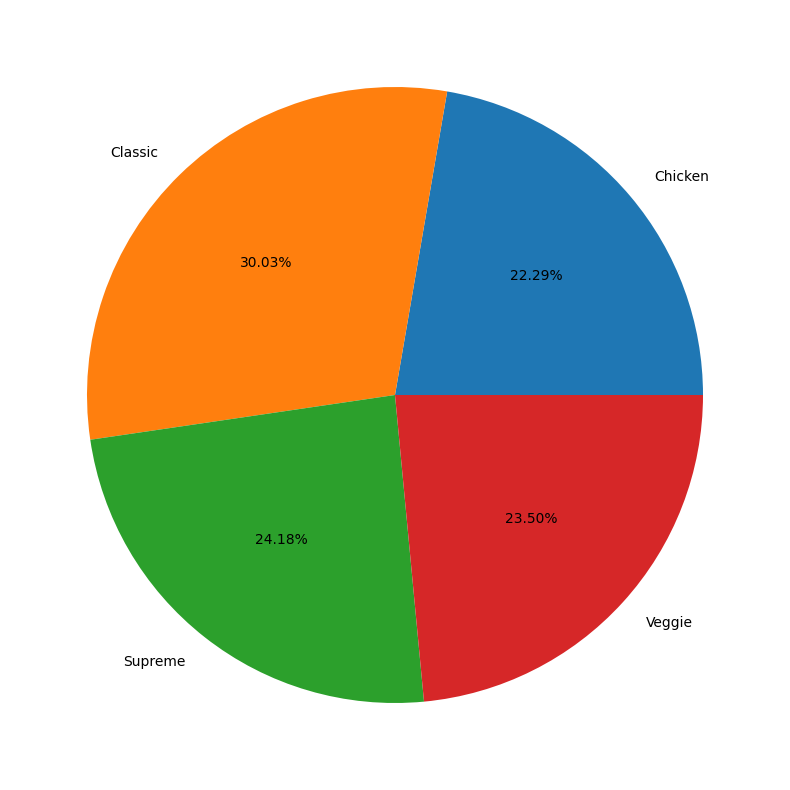

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
pie = ax.pie(kategori_pizza.values,
             labels=kategori_pizza.index, autopct='%1.2f%%')
plt.show(fig)

## **5 Pizza Terlaris**

In [42]:
pizza = df['pizza_name'].value_counts().head()
pizza

The Classic Deluxe Pizza      2416
The Barbecue Chicken Pizza    2372
The Hawaiian Pizza            2370
The Pepperoni Pizza           2369
The Thai Chicken Pizza        2315
Name: pizza_name, dtype: int64

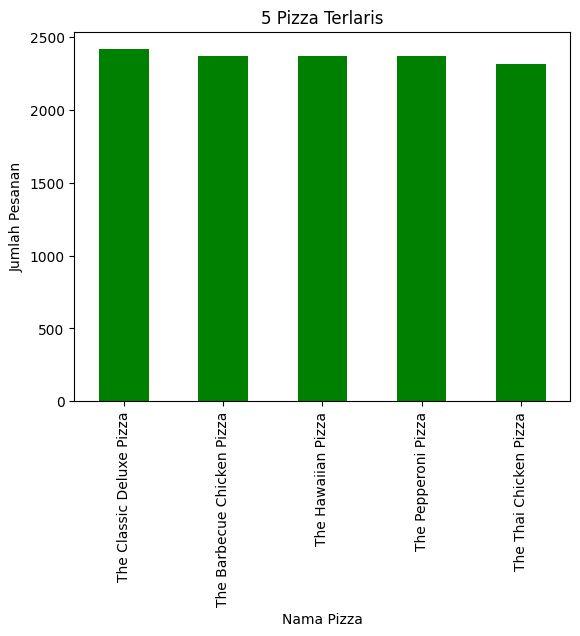

In [43]:
pizza.plot(kind='bar', color='green')
plt.title("5 Pizza Terlaris")
plt.xlabel("Nama Pizza")
plt.ylabel('Jumlah Pesanan')
plt.show()

# **PENYIMPANAN DATASET YANG BERSIH**

In [44]:
df.to_csv('pizza_sales_dataset.csv')